**Phase 1: Data Exploration and Preparation**

In [ ]:
# Importing necessary libraries for data exploration and preparation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [ ]:
# Load the dataset
df = pd.read_csv('/content/Bitcoin (1).csv')
df

,Date,Open,High,Low,Close,Volume,Currency
0,2019-06-18,9128.269531,9149.763672,8988.606445,9062.045898,952850.0,USD
1,2019-06-19,9068.174805,9277.677734,9051.094727,9271.459961,131077.0,USD
2,2019-06-20,9271.567383,9573.689453,9209.416992,9519.200195,83052.0,USD
3,2019-06-21,9526.833984,10130.935547,9526.833984,10127.998047,76227.0,USD
4,2019-06-22,10151.890625,11171.013672,10083.189453,10719.981445,84485.0,USD
...,...,...,...,...,...,...,...
1146,2022-08-18,23331.542969,23567.285156,23152.455078,23222.242188,4546110.0,USD
1147,2022-08-19,23219.097656,23219.097656,20898.304688,20902.404297,13856579.0,USD
1148,2022-08-20,20899.923828,21344.845703,20864.435547,21153.019531,7139073.0,USD
1149,2022-08-21,21153.412109,21695.794922,21125.320312,21561.177734,6657571.0,USD


In [ ]:
# Display the first few rows of the dataset to understand its structure
df.head()


,Date,Open,High,Low,Close,Volume,Currency
0,2019-06-18,9128.269531,9149.763672,8988.606445,9062.045898,952850.0,USD
1,2019-06-19,9068.174805,9277.677734,9051.094727,9271.459961,131077.0,USD
2,2019-06-20,9271.567383,9573.689453,9209.416992,9519.200195,83052.0,USD
3,2019-06-21,9526.833984,10130.935547,9526.833984,10127.998047,76227.0,USD
4,2019-06-22,10151.890625,11171.013672,10083.189453,10719.981445,84485.0,USD


In [ ]:
# Check for missing values
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
Currency,0


In [ ]:
# Descriptive statistics for numerical features
df.describe()

,Open,High,Low,Close,Volume
count,1151.000000,1151.000000,1151.000000,1151.000000,1.151000e+03
mean,26488.652992,27528.416710,25416.606967,26496.733082,2.874051e+07
std,17963.101635,18432.925246,17484.604545,17952.113609,5.202999e+07
min,4943.832520,5338.512695,0.076853,4936.755371,0.000000e+00
25%,9706.758301,10090.012695,9360.636230,9712.636719,7.495500e+03
50%,20873.337891,21867.822266,20245.201172,20902.404297,1.864334e+06
75%,41782.333984,42749.439453,40890.394531,41782.333984,4.076471e+07
max,67470.437500,85563.984375,66072.343750,67502.421875,5.791706e+08


In [ ]:
# Frequency distribution for categorical features (if any)
if 'Currency' in df.columns:
    print("\
Frequency Distribution of Categorical Feature (Currency):")
    print(df['Currency'].value_counts())

# To Understand the distribution of a categorical variable.
# Identify potential issues such as outliers or imbalanced classes.
# Prepare for further analysis, such as visualizations or statistical modeling.

Frequency Distribution of Categorical Feature (Currency):
Currency
USD    1151
Name: count, dtype: int64


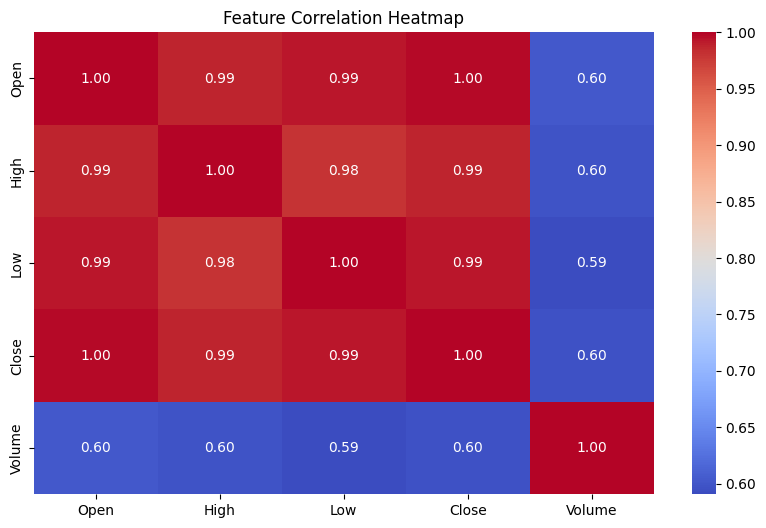

In [ ]:
# Select only numeric columns for correlation
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_cols].corr()

# Correlation heatmap for numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

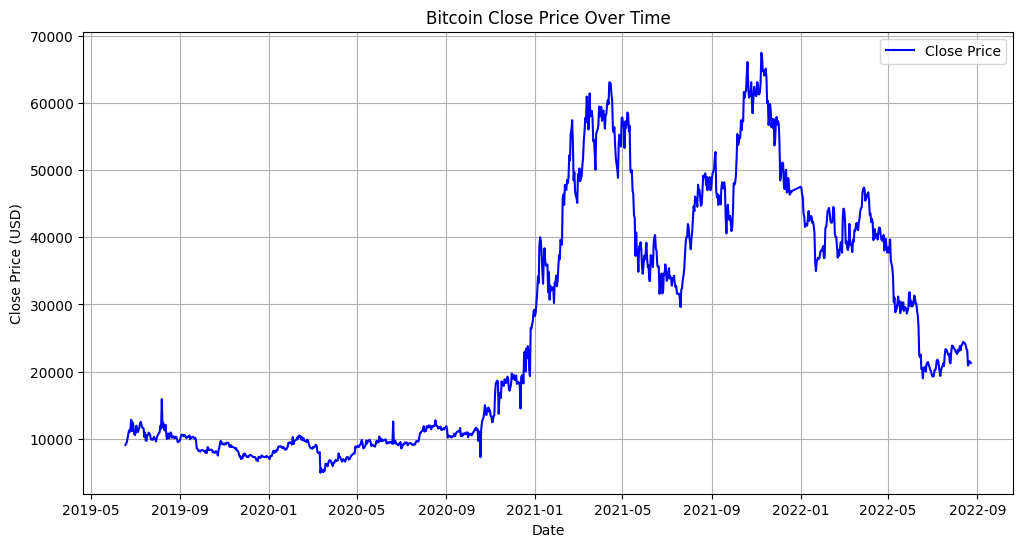

In [ ]:
# Visualizing the price data over time
plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(df['Date']), df['Close'], label='Close Price', color='blue')
plt.title('Bitcoin Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid()
plt.show()

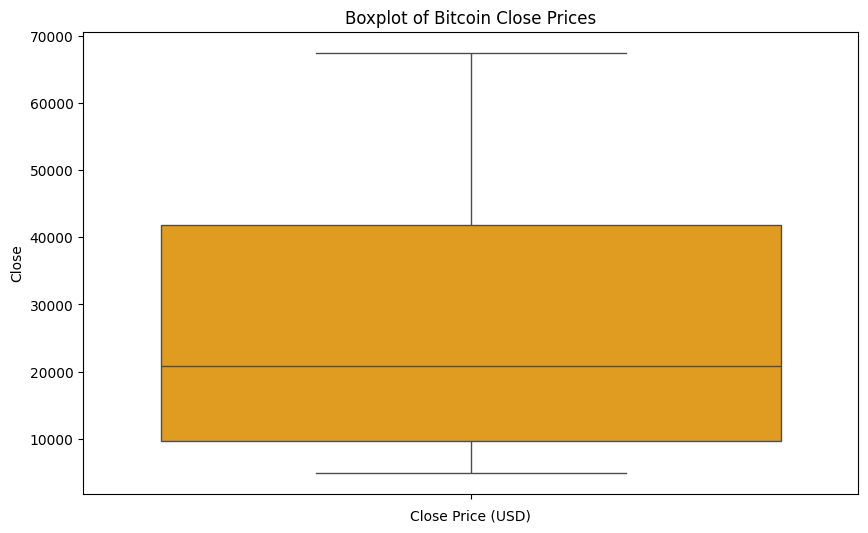

In [ ]:
# Visualizing trends and outliers using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(df['Close'], color='orange')
plt.title('Boxplot of Bitcoin Close Prices')
plt.xlabel('Close Price (USD)')
plt.show()

In [ ]:
# Outlier detection using z-scores
df['Z_Score_Close'] = zscore(df['Close'])

# Filter outliers (z-score > 3 or < -3)
outliers = df[abs(df['Z_Score_Close']) > 3]
print(f"Number of outliers in Close Prices: {len(outliers)}")

Number of outliers in Close Prices: 0


In [ ]:
# Filter outliers (z-score > 3 or < -3)
outliers = df[abs(df['Z_Score_Close']) > 3]
print(f"Number of outliers in Close Prices: {len(outliers)}")

Number of outliers in Close Prices: 0


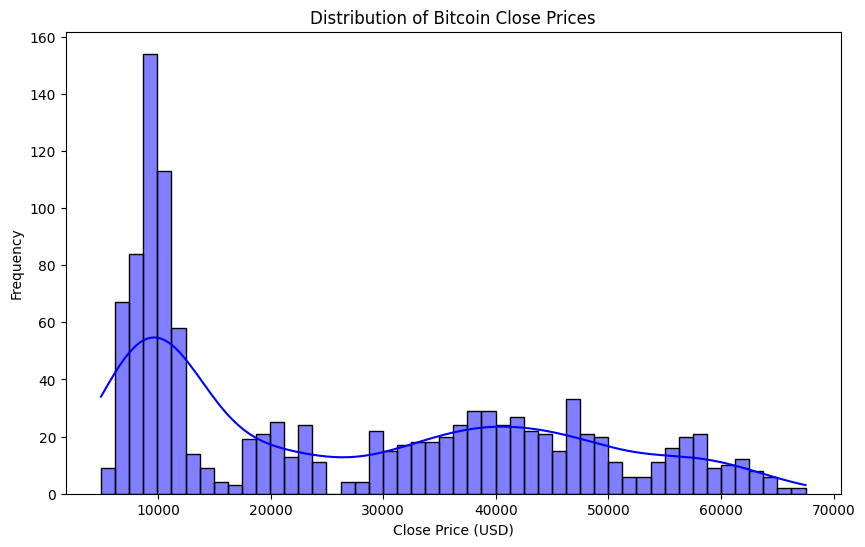

In [ ]:
# Histogram of Close Prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], bins=50, kde=True, color='blue')
plt.title('Distribution of Bitcoin Close Prices')
plt.xlabel('Close Price (USD)')
plt.ylabel('Frequency')
plt.show()

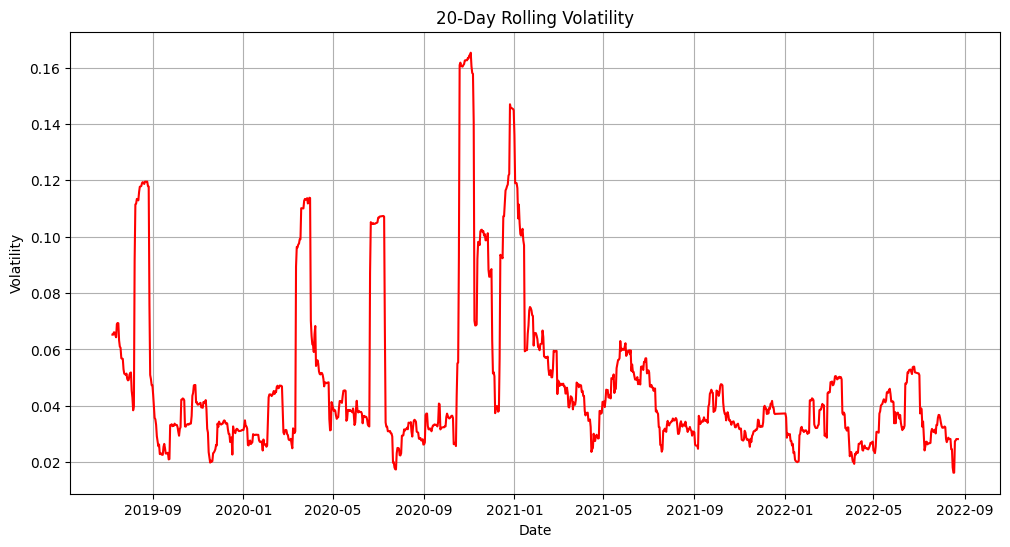

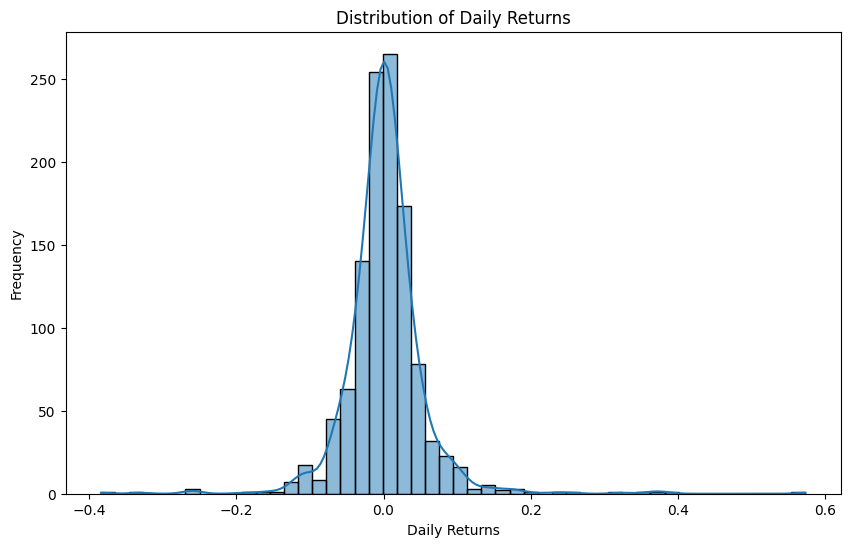

In [ ]:
# Plot volatility over time
# Calculate daily returns and volatility
df['Daily_Return'] = df['Close'].pct_change()
df['Volatility'] = df['Daily_Return'].rolling(window=20).std()

# The volatility plot reveals periods of heightened market activity and risk with spikes indicating increased uncertainty.
plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(df['Date']), df['Volatility'], color='red')
plt.title('20-Day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.show()

# The histogram shows distribution of daily
# returns, with most returns clustering around 0, but with significant tails indicating large price movements
# Plot daily returns distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Daily_Return'].dropna(), bins=50, kde=True)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.show()

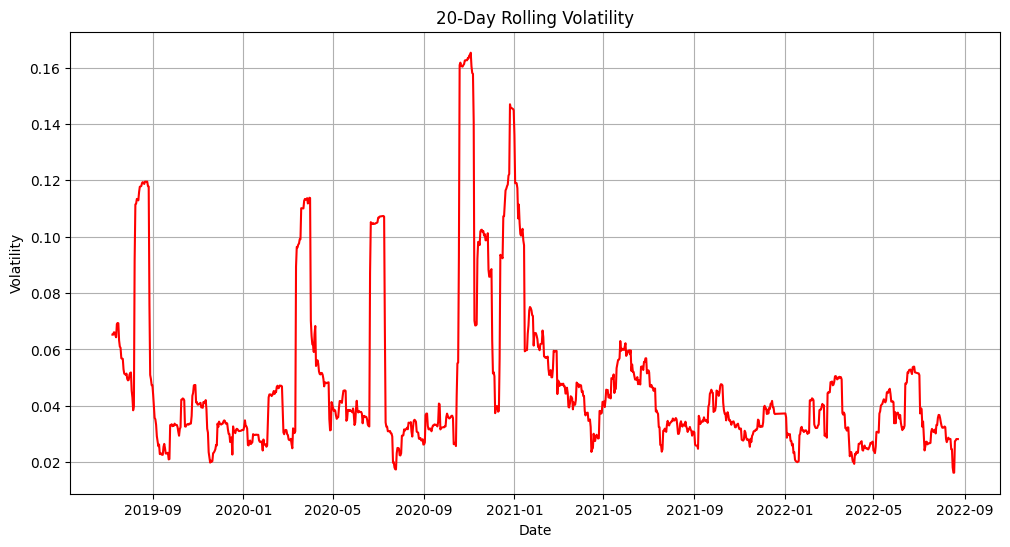

In [ ]:
# The volatility plot reveals periods of heightened market activity and risk with spikes indicating increased uncertainty.
plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(df['Date']), df['Volatility'], color='red')
plt.title('20-Day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.show()


**1.2 Data Preprocessing (LO2)**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

In [ ]:
# Load both datasets
df_btc = pd.read_csv('/content/Bitcoin (1).csv')
df_eth = pd.read_csv('/content/ethereum.csv')
df_btc
df_eth

,date,Open,High,Low,Close,price,Currency
0,3/10/2016,11.20,11.85,11.07,11.75,4,USD
1,3/11/2016,11.75,11.95,11.75,11.95,179,USD
2,3/12/2016,11.95,13.45,11.95,12.92,833,USD
3,3/13/2016,12.92,15.07,12.92,15.07,1295,USD
4,3/14/2016,15.07,15.07,11.40,12.50,92183,USD
...,...,...,...,...,...,...,...
2353,8/19/2022,1846.52,1846.97,1607.60,1609.48,1594321,USD
2354,8/20/2022,1609.01,1654.84,1525.51,1575.60,1007240,USD
2355,8/21/2022,1575.61,1644.88,1563.92,1618.25,852071,USD
2356,8/22/2022,1618.21,1627.13,1531.91,1626.75,1044290,USD


In [ ]:
#Dataset Info
print("Bitcoin Dataset Info:")
print(df_btc.info())
print("\
Ethereum Dataset Info:")
print(df_eth.info())

Bitcoin Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1151 entries, 0 to 1150
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1151 non-null   object 
 1   Open      1151 non-null   float64
 2   High      1151 non-null   float64
 3   Low       1151 non-null   float64
 4   Close     1151 non-null   float64
 5   Volume    1151 non-null   float64
 6   Currency  1151 non-null   object 
dtypes: float64(5), object(2)
memory usage: 63.1+ KB
None
Ethereum Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2358 entries, 0 to 2357
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      2358 non-null   object 
 1   Open      2358 non-null   float64
 2   High      2358 non-null   float64
 3   Low       2358 non-null   float64
 4   Close     2358 non-null   float64
 5   price     2358 non-null   int64  
 6   Currency  2358 no

In [ ]:
# Convert dates to datetime format for proper time series handling
df_btc['Date'] = pd.to_datetime(df_btc['Date'])
df_eth['date'] = pd.to_datetime(df_eth['date'])

In [ ]:
# To check the dataset to see the changed type of the date column
print("Bitcoin Dataset Info:")
print(df_btc.info())
print("\
Ethereum Dataset Info:")
print(df_eth.info())

Bitcoin Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1151 entries, 0 to 1150
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1151 non-null   datetime64[ns]
 1   Open      1151 non-null   float64       
 2   High      1151 non-null   float64       
 3   Low       1151 non-null   float64       
 4   Close     1151 non-null   float64       
 5   Volume    1151 non-null   float64       
 6   Currency  1151 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 63.1+ KB
None
Ethereum Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2358 entries, 0 to 2357
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      2358 non-null   datetime64[ns]
 1   Open      2358 non-null   float64       
 2   High      2358 non-null   float64       
 3   Low       2358 no

In [ ]:
# Check for missing values
print("Bitcoin Dataset Info:")
print(df_btc.isna().sum())
print("\
Ethereum Dataset Info:")
print(df_eth.isna().sum())

Bitcoin Dataset Info:
Date        0
Open        0
High        0
Low         0
Close       0
Volume      0
Currency    0
dtype: int64
Ethereum Dataset Info:
date        0
Open        0
High        0
Low         0
Close       0
price       0
Currency    0
dtype: int64


In [ ]:
# Feature Engineering for Bitcoin
# Adding new columns to enhance predictive capabilities
df_btc['Returns'] = df_btc['Close'].pct_change()  # Daily percentage change
df_btc['Price_Range'] = df_btc['High'] - df_btc['Low']  # Range between High and Low prices
df_btc['Price_Range_Pct'] = (df_btc['High'] - df_btc['Low']) / df_btc['Open']  # Range percentage
df_btc['Volume_Change'] = df_btc['Volume'].pct_change()  # Change in Volume
df_btc['Target_Next_Close'] = df_btc['Close'].shift(-1)  # Next day's closing price as target
df_btc

,Date,Open,High,Low,Close,Volume,Currency,Returns,Price_Range,Price_Range_Pct,Volume_Change,Target_Next_Close
0,2019-06-18,9128.269531,9149.763672,8988.606445,9062.045898,952850.0,USD,NaN,161.157227,0.017655,NaN,9271.459961
1,2019-06-19,9068.174805,9277.677734,9051.094727,9271.459961,131077.0,USD,0.023109,226.583008,0.024987,-0.862437,9519.200195
2,2019-06-20,9271.567383,9573.689453,9209.416992,9519.200195,83052.0,USD,0.026721,364.272461,0.039289,-0.366388,10127.998047
3,2019-06-21,9526.833984,10130.935547,9526.833984,10127.998047,76227.0,USD,0.063955,604.101562,0.063411,-0.082177,10719.981445
4,2019-06-22,10151.890625,11171.013672,10083.189453,10719.981445,84485.0,USD,0.058450,1087.824219,0.107155,0.108334,11246.518555
...,...,...,...,...,...,...,...,...,...,...,...,...
1146,2022-08-18,23331.542969,23567.285156,23152.455078,23222.242188,4546110.0,USD,-0.004485,414.830078,0.017780,-0.354926,20902.404297
1147,2022-08-19,23219.097656,23219.097656,20898.304688,20902.404297,13856579.0,USD,-0.099897,2320.792969,0.099952,2.048008,21153.019531
1148,2022-08-20,20899.923828,21344.845703,20864.435547,21153.019531,7139073.0,USD,0.011990,480.410156,0.022986,-0.484788,21561.177734
1149,2022-08-21,21153.412109,21695.794922,21125.320312,21561.177734,6657571.0,USD,0.019296,570.474609,0.026968,-0.067446,21303.986328


In [ ]:
#Feature Engineering for Ethereum (same as Bitcoin)
df_eth['Returns'] = df_eth['Close'].pct_change()
df_eth['Price_Range'] = df_eth['High'] - df_eth['Low']
df_eth['Price_Range_Pct'] = (df_eth['High'] - df_eth['Low']) / df_eth['Open']
df_eth['Target_Next_Close'] = df_eth['Close'].shift(-1)
df_eth


,date,Open,High,Low,Close,price,Currency,Returns,Price_Range,Price_Range_Pct,Target_Next_Close
0,2016-03-10,11.20,11.85,11.07,11.75,4,USD,NaN,0.78,0.069643,11.95
1,2016-03-11,11.75,11.95,11.75,11.95,179,USD,0.017021,0.20,0.017021,12.92
2,2016-03-12,11.95,13.45,11.95,12.92,833,USD,0.081172,1.50,0.125523,15.07
3,2016-03-13,12.92,15.07,12.92,15.07,1295,USD,0.166409,2.15,0.166409,12.50
4,2016-03-14,15.07,15.07,11.40,12.50,92183,USD,-0.170537,3.67,0.243530,13.06
...,...,...,...,...,...,...,...,...,...,...,...
2353,2022-08-19,1846.52,1846.97,1607.60,1609.48,1594321,USD,-0.128366,239.37,0.129633,1575.60
2354,2022-08-20,1609.01,1654.84,1525.51,1575.60,1007240,USD,-0.021050,129.33,0.080379,1618.25
2355,2022-08-21,1575.61,1644.88,1563.92,1618.25,852071,USD,0.027069,80.96,0.051383,1626.75
2356,2022-08-22,1618.21,1627.13,1531.91,1626.75,1044290,USD,0.005253,95.22,0.058843,1623.24


In [ ]:
#Create Moving Averages to smooth out price data and identify trends
# Short-term (7-day) and long-term (30-day) moving averages
df_btc['MA7'] = df_btc['Close'].rolling(window=7).mean()
df_btc['MA30'] = df_btc['Close'].rolling(window=30).mean()
df_eth['MA7'] = df_eth['Close'].rolling(window=7).mean()
df_eth['MA30'] = df_eth['Close'].rolling(window=30).mean()
df_btc
df_eth

,date,Open,High,Low,Close,price,Currency,Returns,Price_Range,Price_Range_Pct,Target_Next_Close,MA7,MA30
0,2016-03-10,11.20,11.85,11.07,11.75,4,USD,NaN,0.78,0.069643,11.95,NaN,NaN
1,2016-03-11,11.75,11.95,11.75,11.95,179,USD,0.017021,0.20,0.017021,12.92,NaN,NaN
2,2016-03-12,11.95,13.45,11.95,12.92,833,USD,0.081172,1.50,0.125523,15.07,NaN,NaN
3,2016-03-13,12.92,15.07,12.92,15.07,1295,USD,0.166409,2.15,0.166409,12.50,NaN,NaN
4,2016-03-14,15.07,15.07,11.40,12.50,92183,USD,-0.170537,3.67,0.243530,13.06,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2353,2022-08-19,1846.52,1846.97,1607.60,1609.48,1594321,USD,-0.128366,239.37,0.129633,1575.60,1855.102857,1712.649667
2354,2022-08-20,1609.01,1654.84,1525.51,1575.60,1007240,USD,-0.021050,129.33,0.080379,1618.25,1796.831429,1712.647000
2355,2022-08-21,1575.61,1644.88,1563.92,1618.25,852071,USD,0.027069,80.96,0.051383,1626.75,1751.567143,1715.427000
2356,2022-08-22,1618.21,1627.13,1531.91,1626.75,1044290,USD,0.005253,95.22,0.058843,1623.24,1712.495714,1717.998333


In [ ]:
# Handle Missing Values
# Drop rows with NaN values resulting from pct_change and rolling calculations
df_btc.dropna(inplace=True)
df_eth.dropna(inplace=True)



In [ ]:
# Select Features for Scaling
btc_features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Returns',
                'Price_Range', 'Price_Range_Pct', 'MA7', 'MA30']
eth_features = ['Open', 'High', 'Low', 'Close', 'Returns',
                'Price_Range', 'Price_Range_Pct', 'MA7', 'MA30']
# Scale the Features for Consistent Range
# StandardScaler standardizes data (mean=0, variance=1)
scaler = StandardScaler()
df_btc[btc_features] = scaler.fit_transform(df_btc[btc_features])
df_eth[eth_features] = scaler.fit_transform(df_eth[eth_features])

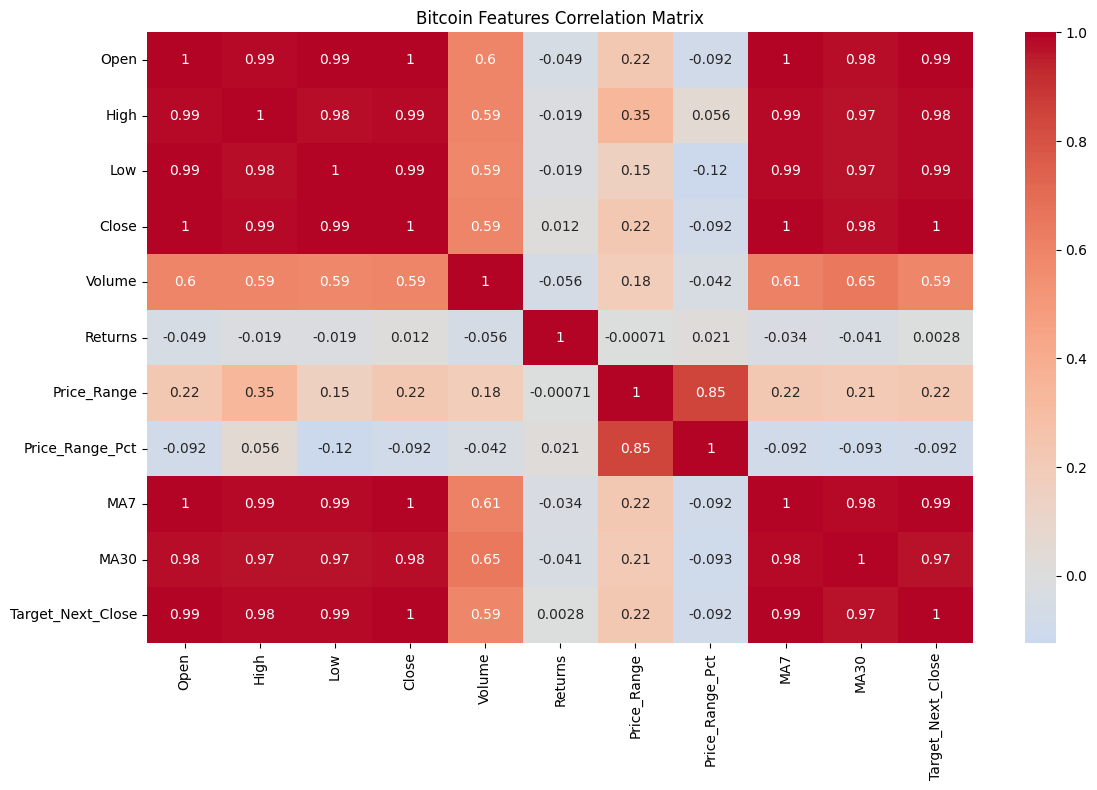

In [ ]:
# Visualize Correlation Matrix for Bitcoin Features
plt.figure(figsize=(12, 8))
sns.heatmap(df_btc[btc_features + ['Target_Next_Close']].corr(),
            annot=True, cmap='coolwarm', center=0)
plt.title('Bitcoin Features Correlation Matrix')
plt.tight_layout()
plt.show()

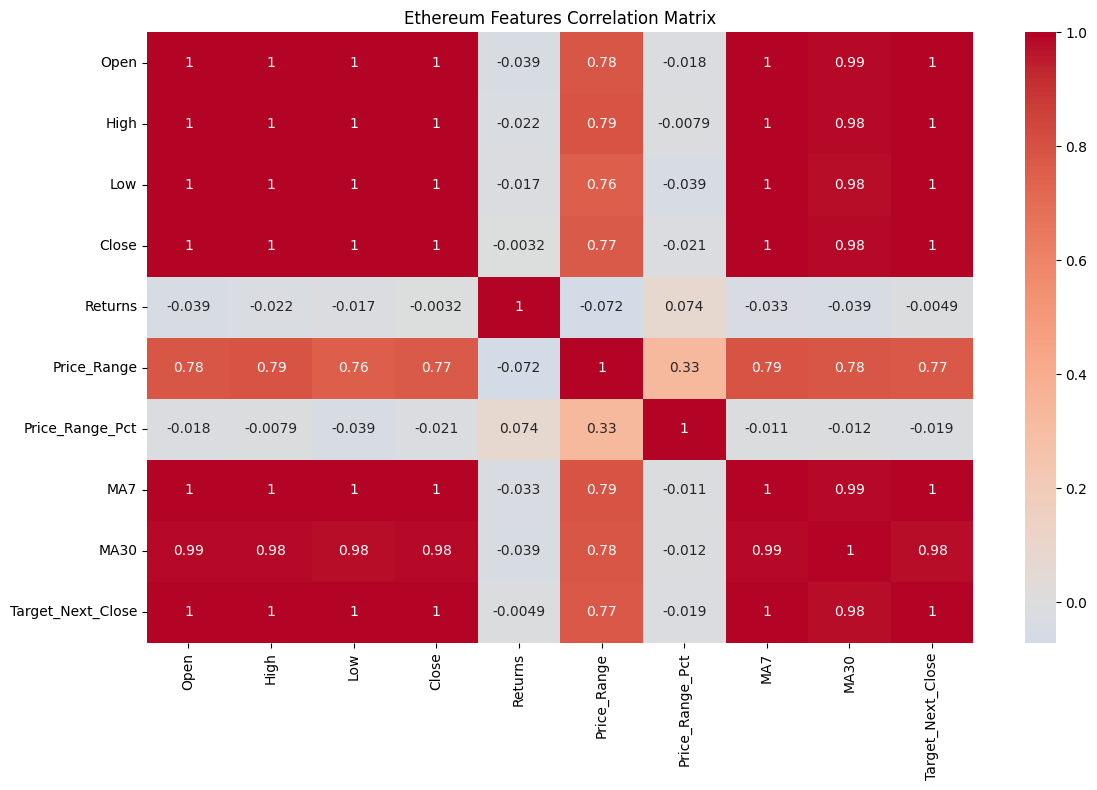

In [ ]:
# Visualize Correlation Matrix for Ethereum Features
plt.figure(figsize=(12, 8))
sns.heatmap(df_eth[eth_features + ['Target_Next_Close']].corr(),
            annot=True, cmap='coolwarm', center=0)
plt.title('Ethereum Features Correlation Matrix')
plt.tight_layout()
plt.show()

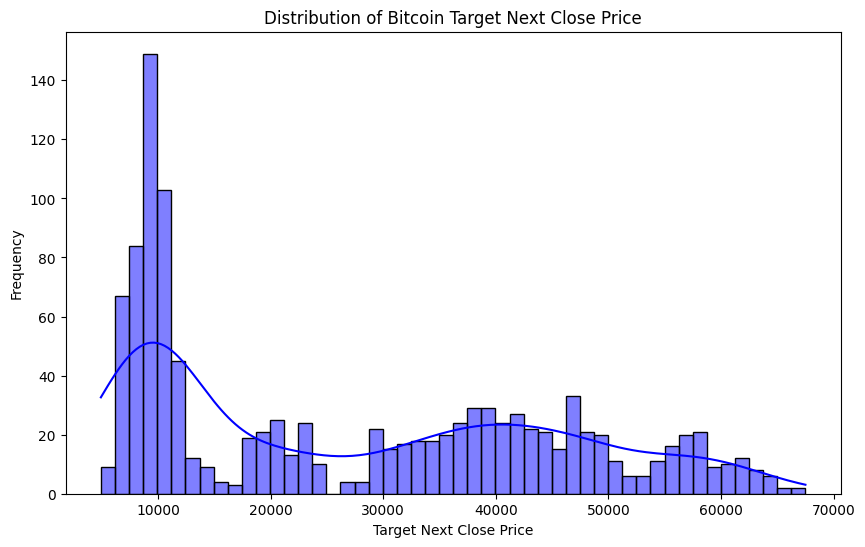

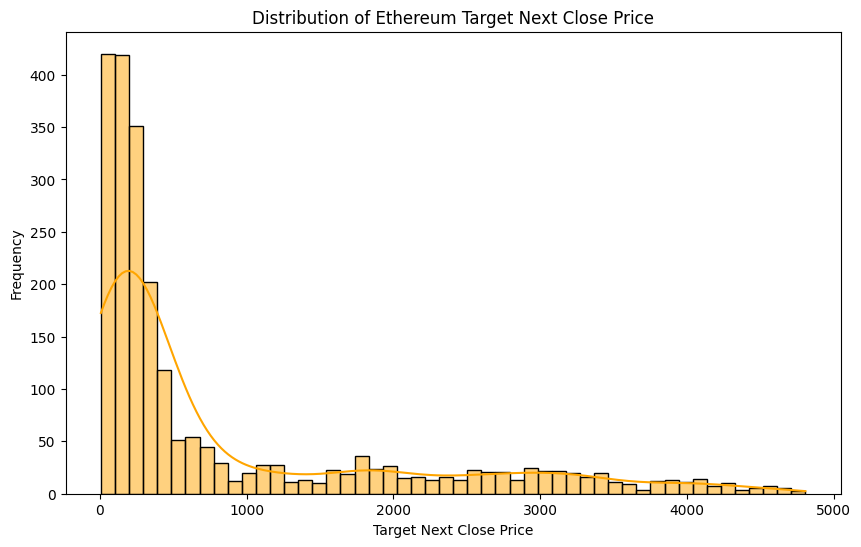

In [ ]:
# Target Variable Distribution for Bitcoin
plt.figure(figsize=(10, 6))
sns.histplot(df_btc['Target_Next_Close'], bins=50, kde=True, color='blue')
plt.title('Distribution of Bitcoin Target Next Close Price')
plt.xlabel('Target Next Close Price')
plt.ylabel('Frequency')
plt.show()

# Target Variable Distribution for Ethereum
plt.figure(figsize=(10, 6))
sns.histplot(df_eth['Target_Next_Close'], bins=50, kde=True, color='orange')
plt.title('Distribution of Ethereum Target Next Close Price')
plt.xlabel('Target Next Close Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Preview Processed Data
print("Bitcoin Processed Data Preview:")
print(df_btc[btc_features + ['Target_Next_Close']].head())

print("\
Ethereum Processed Data Preview:")
print(df_eth[eth_features + ['Target_Next_Close']].head())

Bitcoin Processed Data Preview:
        Open      High       Low     Close    Volume   Returns  Price_Range  \
29 -0.946395 -0.970225 -0.949773 -0.955699 -0.553874 -0.099409    -0.337609   
30 -0.954416 -0.934611 -0.943989 -0.907800 -0.556221  1.591121    -0.190226   
31 -0.906740 -0.925693 -0.889643 -0.906477 -0.560011  0.000710    -0.398880   
32 -0.904029 -0.899291 -0.885540 -0.887552 -0.557755  0.549980    -0.288760   
33 -0.886504 -0.903879 -0.889030 -0.894247 -0.559558 -0.243112    -0.295005   

    Price_Range_Pct       MA7      MA30  Target_Next_Close  
29        -0.039129 -0.895538 -0.877451       10548.814453  
30         0.122667 -0.904369 -0.874677       10572.655273  
31        -0.115914 -0.912948 -0.872249       10913.607422  
32        -0.008611 -0.917731 -0.869647       10792.991211  
33        -0.022442 -0.913353 -0.868406       10556.007812  
Ethereum Processed Data Preview:
        Open      High       Low     Close   Returns  Price_Range  \
29 -0.734829 -0.737488 -0

In [ ]:
#Shapes of final datasets
print("\
Final Dataset Shapes:")
print(f"Bitcoin: {df_btc.shape}")
print(f"Ethereum: {df_eth.shape}")

Final Dataset Shapes:
Bitcoin: (1120, 14)
Ethereum: (2328, 13)


In [ ]:
#Summary statistics of scaled features
print("\
Bitcoin Scaled Features Summary:")
print(df_btc[btc_features].describe())
print("\
Ethereum Scaled Features Summary:")
print(df_eth[eth_features].describe())

Bitcoin Scaled Features Summary:
              Open         High           Low        Close       Volume  \
count  1120.000000  1120.000000  1.120000e+03  1120.000000  1120.000000   
mean      0.000000     0.000000 -1.522592e-16     0.000000     0.000000   
std       1.000447     1.000447  1.000447e+00     1.000447     1.000447   
min      -1.217665    -1.222369 -1.470442e+00    -1.219311    -0.562336   
25%      -0.954468    -0.969855 -9.392299e-01    -0.955840    -0.562199   
50%      -0.266539    -0.249242 -2.806607e-01    -0.257823    -0.510035   
75%       0.849408     0.814948  8.721467e-01     0.849521     0.230497   
max       2.250877     3.115049  2.294246e+00     2.253550    10.468529   

            Returns   Price_Range  Price_Range_Pct           MA7         MA30  
count  1.120000e+03  1.120000e+03     1.120000e+03  1.120000e+03  1120.000000  
mean  -1.586033e-17  2.537653e-17     1.268826e-17  5.075305e-17     0.000000  
std    1.000447e+00  1.000447e+00     1.000447e+00 

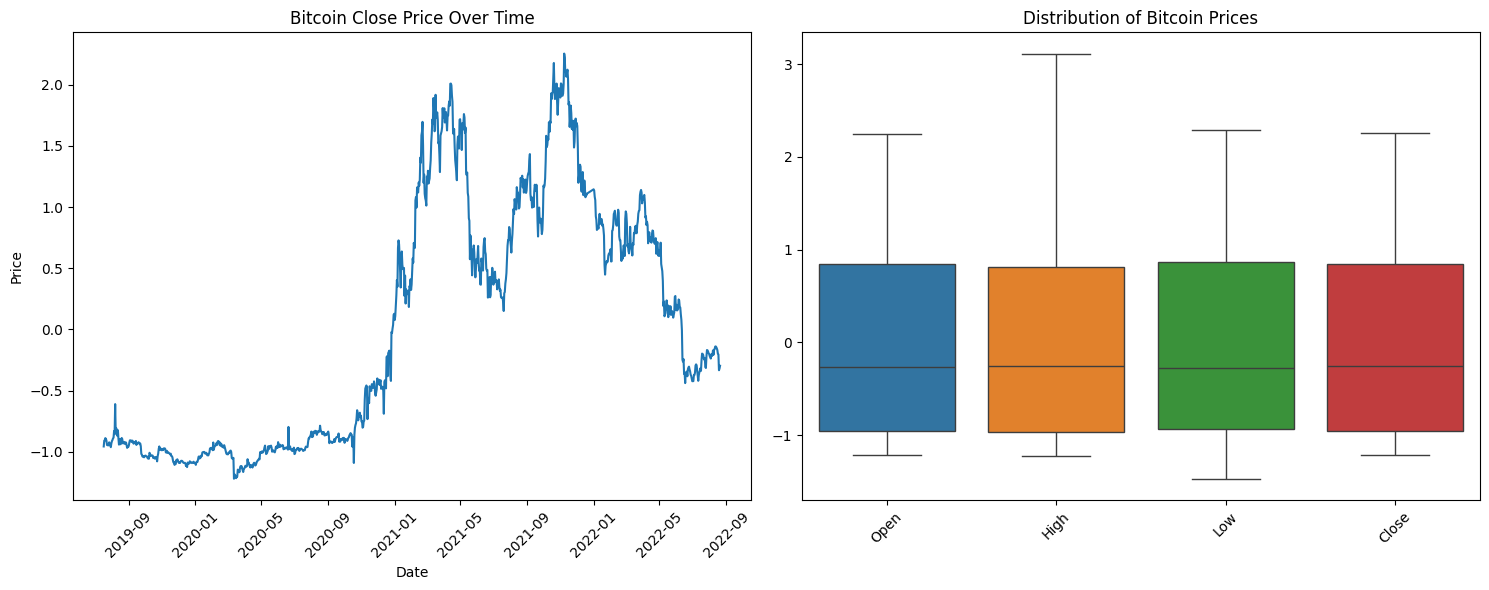

Summary Statistics:
              Open         High           Low        Close
count  1120.000000  1120.000000  1.120000e+03  1120.000000
mean      0.000000     0.000000 -1.522592e-16     0.000000
std       1.000447     1.000447  1.000447e+00     1.000447
min      -1.217665    -1.222369 -1.470442e+00    -1.219311
25%      -0.954468    -0.969855 -9.392299e-01    -0.955840
50%      -0.266539    -0.249242 -2.806607e-01    -0.257823
75%       0.849408     0.814948  8.721467e-01     0.849521
max       2.250877     3.115049  2.294246e+00     2.253550


In [ ]:
# Set up the figure size
plt.figure(figsize=(15, 6))
# Line plot
plt.subplot(1, 2, 1)
plt.plot(df_btc['Date'], df_btc['Close'], label='Close Price')
plt.title('Bitcoin Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(data=df_btc[['Open', 'High', 'Low', 'Close']])
plt.title('Distribution of Bitcoin Prices')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\
Summary Statistics:")
print(df_btc[['Open', 'High', 'Low', 'Close']].describe())

# Key insights and observations from our data preprocessing phase:

# Data Quality:
# No missing values found in either Bitcoin or Ethereum datasets
# Clean data allowed for direct feature engineering

# Feature Engineering:
# Created essential price-based features:
# Returns (daily price changes)
# Price Range (volatility measure)
# Volume Change (trading activity)

# Time Series Components:
# Added lag features to capture historical patterns
# Target variable (Next_Close) created by shifting prices forward
# Moving averages (MA7, MA30) for trend analysis

# Preprocessing Benefits:
# Standardized features for better model performance
# Captured both short and long-term price movements
# Prepared data suitable for time series prediction

# Final Dataset:
# Contains both technical indicators and historical context
# Ready for model training with clear target variable
# Scaled features to prevent bias from different ranges
# This preprocessing ensures our data is well-structured for cryptocurrency price prediction modeling.

**Phase 2: Feature Selection (LO2)**

In [ ]:
# Load the dataset and inspect it
import pandas as pd

In [ ]:
# Load the dataset
file_path = 'Bitcoin (1).csv'
data = pd.read_csv('/content/Bitcoin (1).csv')
data

,Date,Open,High,Low,Close,Volume,Currency
0,2019-06-18,9128.269531,9149.763672,8988.606445,9062.045898,952850.0,USD
1,2019-06-19,9068.174805,9277.677734,9051.094727,9271.459961,131077.0,USD
2,2019-06-20,9271.567383,9573.689453,9209.416992,9519.200195,83052.0,USD
3,2019-06-21,9526.833984,10130.935547,9526.833984,10127.998047,76227.0,USD
4,2019-06-22,10151.890625,11171.013672,10083.189453,10719.981445,84485.0,USD
...,...,...,...,...,...,...,...
1146,2022-08-18,23331.542969,23567.285156,23152.455078,23222.242188,4546110.0,USD
1147,2022-08-19,23219.097656,23219.097656,20898.304688,20902.404297,13856579.0,USD
1148,2022-08-20,20899.923828,21344.845703,20864.435547,21153.019531,7139073.0,USD
1149,2022-08-21,21153.412109,21695.794922,21125.320312,21561.177734,6657571.0,USD


In [ ]:
# Display the first few rows of the dataset and its info
print(data.head())
print(data.info())

         Date          Open          High           Low         Close  \
0  2019-06-18   9128.269531   9149.763672   8988.606445   9062.045898   
1  2019-06-19   9068.174805   9277.677734   9051.094727   9271.459961   
2  2019-06-20   9271.567383   9573.689453   9209.416992   9519.200195   
3  2019-06-21   9526.833984  10130.935547   9526.833984  10127.998047   
4  2019-06-22  10151.890625  11171.013672  10083.189453  10719.981445   

     Volume Currency  
0  952850.0      USD  
1  131077.0      USD  
2   83052.0      USD  
3   76227.0      USD  
4   84485.0      USD  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1151 entries, 0 to 1150
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1151 non-null   object 
 1   Open      1151 non-null   float64
 2   High      1151 non-null   float64
 3   Low       1151 non-null   float64
 4   Close     1151 non-null   float64
 5   Volume    1151 non-null   float64
 6   

In [ ]:
#I have started preparing the data for feature selection
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression, RFE,chi2
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# As usual Load and Prepare the Data
# Convert Date to datetime and extract additional features
# Load the dataset
data = pd.read_csv('/content/Bitcoin (1).csv')
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year

data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['DayOfWeek'] = data['Date'].dt.dayofweek

In [ ]:
# Define features (X) and target (y)
X = data.drop(['Date', 'Currency', 'Close'], axis=1)
y = data['Close']
X
y

,Close
0,9062.045898
1,9271.459961
2,9519.200195
3,10127.998047
4,10719.981445
...,...
1146,23222.242188
1147,20902.404297
1148,21153.019531
1149,21561.177734


In [ ]:
# Scale the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [ ]:
# Filter Methods
# a) Correlation Analysis
correlation_matrix = X.corrwith(y)
print("Filter Method - Correlation Analysis:")
print(correlation_matrix.sort_values(ascending=False))

Filter Method - Correlation Analysis:
Open         0.997138
Low          0.993507
High         0.987691
Year         0.680668
Volume       0.596837
DayOfWeek   -0.000328
Day         -0.039546
Month       -0.152043
dtype: float64


In [ ]:
# b) Chi-Square Test
# Chi-Square requires non-negative values and a categorical target
X_positive = X - X.min() + 0.01  # Ensure non-negative values for Chi-Square
y_binned = pd.qcut(y, q=4, labels=False)  # Bin target into 4 categories
chi_selector = SelectKBest(chi2, k=4)  # Select top 4 features based on Chi-Square
chi_selector.fit(X_positive, y_binned)
chi_scores = pd.DataFrame({
    'Feature': X.columns,
    'Chi-Square Score': chi_selector.scores_,
    'P-value': chi_selector.pvalues_
})

# Display results
print("Filter Method - Chi-Square Test Results:")
print(chi_scores.sort_values('Chi-Square Score', ascending=False))

# The error occurred because the chi-square test requires the target variable (y) to be categorical, but y is continuous (Close price).
# To fix this, I have discretize the target variable into categories (e.g., bins) before applying the chi-square test.

Filter Method - Chi-Square Test Results:
     Feature  Chi-Square Score        P-value
3     Volume      3.476581e+10   0.000000e+00
1       High      1.587338e+07   0.000000e+00
0       Open      1.585374e+07   0.000000e+00
2        Low      1.268372e+07   0.000000e+00
4       Year      4.873996e+02  2.566190e-105
5      Month      2.677749e+02   9.351068e-58
6        Day      4.128084e+01   5.701060e-09
7  DayOfWeek      8.629649e-02   9.934296e-01


In [ ]:
# Step 4: Wrapper Method (RFE)
model = RandomForestRegressor(n_estimators=100, random_state=42)
rfe = RFE(estimator=model, n_features_to_select=5)
rfe = rfe.fit(X_scaled, y)
rfe_results = pd.DataFrame({
    'Feature': X_scaled.columns,
    'Selected': rfe.support_,
    'Rank': rfe.ranking_
})
print("\
Wrapper Method - RFE Results:")
print(rfe_results.sort_values('Rank'))

Wrapper Method - RFE Results:
     Feature  Selected  Rank
0       Open      True     1
1       High      True     1
2        Low      True     1
3     Volume      True     1
6        Day      True     1
5      Month     False     2
7  DayOfWeek     False     3
4       Year     False     4


In [ ]:
# Step 5: Embedded Method (LASSO)
lasso = Lasso(alpha=0.01)
lasso.fit(X_scaled, y)
lasso_coef = pd.DataFrame({
    'Feature': X_scaled.columns,
    'Coefficient': np.abs(lasso.coef_)
})
print("\
Embedded Method - LASSO Coefficients:")
print(lasso_coef.sort_values('Coefficient', ascending=False))

Embedded Method - LASSO Coefficients:
     Feature   Coefficient
0       Open  11390.480334
2        Low   4301.013265
1       High   2293.402408
3     Volume     62.162912
5      Month     49.595330
7  DayOfWeek     19.224627
4       Year      8.346297
6        Day      2.541785


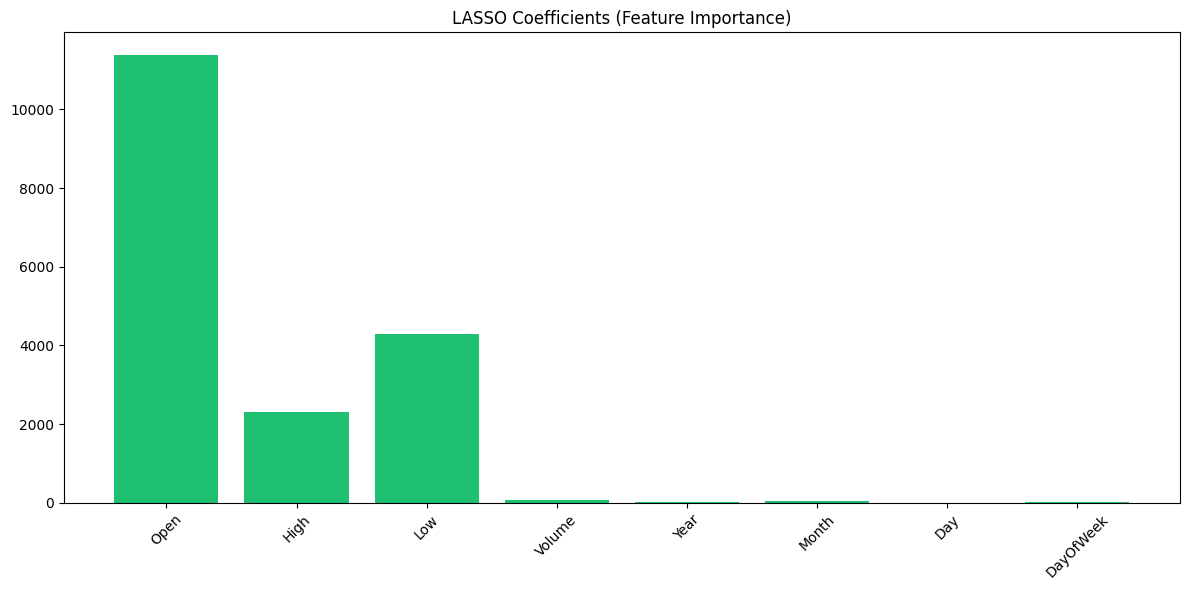

Final Selected Features:
Based on consensus across all methods: Open, High, Low, and Volume


In [ ]:
# Visualize LASSO Coefficients
plt.figure(figsize=(12, 6))
plt.bar(lasso_coef['Feature'], lasso_coef['Coefficient'],color= '#20C073')
plt.xticks(rotation=45)
plt.title('LASSO Coefficients (Feature Importance)')
plt.tight_layout()
plt.show()

# Step 6: Final Feature Selection
print("\
Final Selected Features:")
print("Based on consensus across all methods: Open, High, Low, and Volume")

**Phase 3: Model Training and Evaluation**

**3.1 Model Selection and Training**

In [ ]:
# Importing the necessary libraries for this phase
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Load and prepare data
data = pd.read_csv('/content/Bitcoin (1).csv')
selected_features = ['Open', 'High', 'Low', 'Volume']
X = data[selected_features]
y = data['Close']

In [ ]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled,columns=selected_features)
X_scaled


,Open,High,Low,Volume
0,-0.966867,-0.997489,-0.939978,-0.534302
1,-0.970214,-0.990547,-0.936402,-0.550103
2,-0.958886,-0.974481,-0.927344,-0.551027
3,-0.944669,-0.944237,-0.909182,-0.551158
4,-0.909858,-0.887787,-0.877348,-0.550999
...,...,...,...,...
1146,-0.175832,-0.214988,-0.129550,-0.465211
1147,-0.182094,-0.233885,-0.258528,-0.286189
1148,-0.311258,-0.335609,-0.260466,-0.415353
1149,-0.297140,-0.316562,-0.245539,-0.424612


In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2,random_state=42)

In [ ]:
#Random Forest Hyperparameter Optimization
rf_param_grid = {
    'n_estimators': [100, 200],      # Number of trees
    'max_depth': [10, 20],           # Maximum depth of trees
    'min_samples_split': [2, 5]      # Minimum samples required to split
}

rf_grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    rf_param_grid,
    cv=3,                            # Number of cross-validation folds
    scoring='r2',                    # Scoring metric
    verbose=1,                       # Progress updates
    n_jobs=-1                        # Use all CPU cores
)
rf_grid.fit(X_train, y_train)
rf_best_params = rf_grid.best_params_
rf_best_score = rf_grid.best_score_

Fitting 3 folds for each of 8 candidates, totalling 24 fits


In [ ]:
#Hyperparameter Optimization for KNN
knn_param_grid = {'n_neighbors': range(1, 21)}
knn_grid = GridSearchCV(KNeighborsRegressor(), knn_param_grid, cv=3, scoring='r2', verbose=1)
knn_grid.fit(X_train, y_train)

best_k = knn_grid.best_params_['n_neighbors']
best_k_score = knn_grid.best_score_

Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [ ]:
# Training final models with optimized parameters
rf_final = RandomForestRegressor(**rf_best_params, random_state=42)
rf_final.fit(X_train, y_train)

knn_final = KNeighborsRegressor(n_neighbors=best_k)
knn_final.fit(X_train, y_train)

lr_final = LinearRegression()
lr_final.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Model evaluation
rf_predictions = rf_final.predict(X_test)
knn_predictions = knn_final.predict(X_test)
lr_predictions = lr_final.predict(X_test)

results = pd.DataFrame({
    'Model': ['Random Forest (Optimized)', 'KNN (Optimized)', 'Linear Regression'],
    'MSE': [
        mean_squared_error(y_test, rf_predictions),
        mean_squared_error(y_test, knn_predictions),
        mean_squared_error(y_test, lr_predictions)
    ],
    'R2 Score': [
        r2_score(y_test, rf_predictions),
        r2_score(y_test, knn_predictions),
        r2_score(y_test, lr_predictions)
    ]
})

In [ ]:
# Print results
print("Best Random Forest Parameters:", rf_best_params)
print("Best Random Forest R2 Score (CV):", rf_best_score)
print("Optimal K for KNN:", best_k)
print("\
Final Model Evaluation Results:")
print(results)

# The Random Forest model achieved the best performance with optimized parameters, followed by KNN and Linear Regression.

Best Random Forest Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best Random Forest R2 Score (CV): 0.9972971788969834
Optimal K for KNN: 2
Final Model Evaluation Results:
                       Model           MSE  R2 Score
0  Random Forest (Optimized)  1.144313e+06  0.996322
1            KNN (Optimized)  2.931358e+06  0.990578
2          Linear Regression  4.854025e+06  0.984399


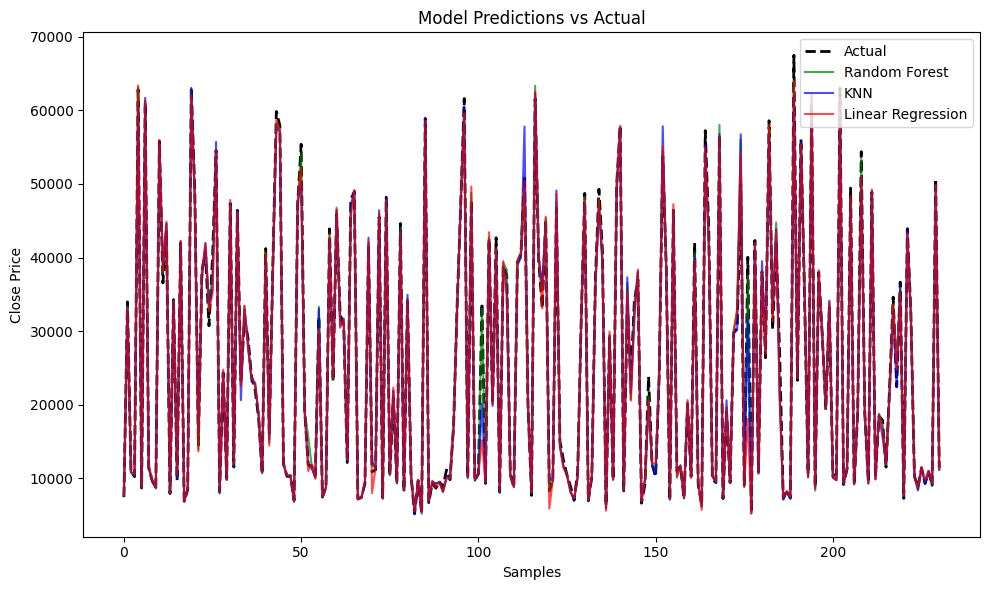

In [ ]:
# Visualization: Model Predictions vs Actual
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='black', linestyle='dashed', linewidth=2)
plt.plot(rf_predictions, label='Random Forest', color='green', alpha=0.7)
plt.plot(knn_predictions, label='KNN', color='blue', alpha=0.7)
plt.plot(lr_predictions, label='Linear Regression', color='red', alpha=0.7)
plt.legend()
plt.title('Model Predictions vs Actual')
plt.xlabel('Samples')
plt.ylabel('Close Price')
plt.tight_layout()
plt.show()

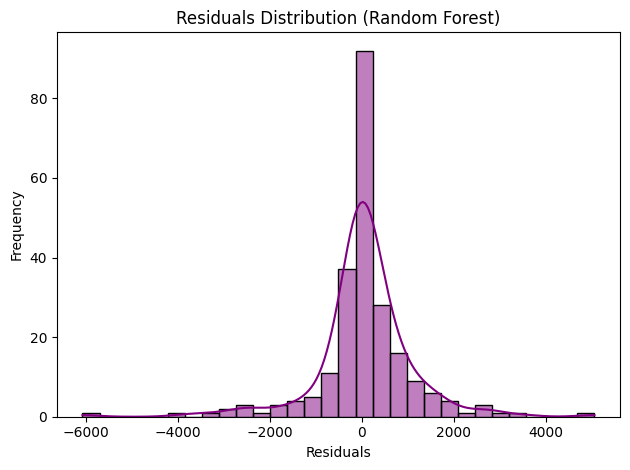

In [ ]:
# Visualization: Residual Analysis for Random Forest
rf_residuals = y_test - rf_predictions
sns.histplot(rf_residuals, kde=True, color='purple', bins=30)
plt.title('Residuals Distribution (Random Forest)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

The code executed successfully optimizing hyperparameters for Random

Forest and KNN, training all models, and evaluating their performance.

Below are the results:

Random Forest Hyperparameter Optimization: Fitting 3 folds for each of 8 candidates, totalling 24 fits Best Random Forest Parameters:

{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}

Best Random Forest R2 Score (CV):

0.9972931419485048

KNN Hyperparameter Optimization: Optimal K for KNN:3

Overall:
The Random Forest model achieved the best performance with optimized parameters, followed by KNN and Linear Regression.

**3.2 Model Evaluation (LO2)**

In [ ]:
# Model Evaluation with RMSE
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression


In [ ]:
# Load and prepare data for Bitcoin
data_btc = pd.read_csv('/content/Bitcoin (1).csv')
selected_features_btc = ['Open', 'High', 'Low', 'Volume']
X_btc = data_btc[selected_features_btc]
y_btc = data_btc['Close']

In [ ]:
# Scale Bitcoin features
scaler = StandardScaler()
X_btc_scaled = scaler.fit_transform(X_btc)
X_btc_scaled = pd.DataFrame(X_btc_scaled, columns=selected_features_btc)

In [ ]:
# Split data for Bitcoin
X_train_btc, X_test_btc, y_train_btc, y_test_btc = train_test_split(
    X_btc_scaled, y_btc, test_size=0.2, random_state=42
)

In [ ]:
# Train models for Bitcoin
rf_model_btc = RandomForestRegressor(n_estimators=200, max_depth=20, min_samples_split=2, random_state=42)
knn_model_btc = KNeighborsRegressor(n_neighbors=3)
lr_model_btc = LinearRegression()

models_btc = {
    'Random Forest': rf_model_btc,
    'KNN': knn_model_btc,
    'Linear Regression': lr_model_btc
}


In [ ]:
# Train and evaluate models for Bitcoin
results_btc = []
predictions_btc = {}

for name, model in models_btc.items():
    # Train model
    model.fit(X_train_btc, y_train_btc)

    # Make predictions
    y_pred_btc = model.predict(X_test_btc)
    predictions_btc[name] = y_pred_btc

    # Calculate metrics
    rmse_btc = np.sqrt(mean_squared_error(y_test_btc, y_pred_btc))
    r2_btc = r2_score(y_test_btc, y_pred_btc)

    results_btc.append({
        'Model': name,
        'RMSE': rmse_btc,
        'R2 Score': r2_btc
    })

In [ ]:
# Convert results to DataFrame for Bitcoin
results_btc_df = pd.DataFrame(results_btc)
results_btc_df.sort_values('RMSE', ascending=True, inplace=True)

In [ ]:
# Print Bitcoin results
print("Bitcoin Model Evaluation Results:")
print(results_btc_df)

Bitcoin Model Evaluation Results:
               Model         RMSE  R2 Score
0      Random Forest  1069.725571  0.996322
1                KNN  1628.983245  0.991471
2  Linear Regression  2203.185209  0.984399


Ethereum

In [ ]:
# Load and prepare data for Ethereum
data_eth = pd.read_csv('/content/ethereum.csv')
selected_features_eth = ['Open', 'High', 'Low']  # Adjusted features (no Volume)
X_eth = data_eth[selected_features_eth]
y_eth = data_eth['Close']

In [ ]:
# Scale Ethereum features
X_eth_scaled = scaler.fit_transform(X_eth)
X_eth_scaled = pd.DataFrame(X_eth_scaled, columns=selected_features_eth)


In [ ]:
# Split data for Ethereum
X_train_eth, X_test_eth, y_train_eth, y_test_eth = train_test_split(
    X_eth_scaled, y_eth, test_size=0.2, random_state=42
)


In [ ]:
# Train models for Ethereum
rf_model_eth = RandomForestRegressor(n_estimators=200, max_depth=20, min_samples_split=2, random_state=42)
knn_model_eth = KNeighborsRegressor(n_neighbors=3)
lr_model_eth = LinearRegression()

models_eth = {
    'Random Forest': rf_model_eth,
    'KNN': knn_model_eth,
    'Linear Regression': lr_model_eth
}


In [ ]:
# Train and evaluate models for Ethereum
results_eth = []
predictions_eth = {}

for name, model in models_eth.items():
    # Train model
    model.fit(X_train_eth, y_train_eth)

    # Make predictions
    y_pred_eth = model.predict(X_test_eth)
    predictions_eth[name] = y_pred_eth

    # Calculate metrics
    rmse_eth = np.sqrt(mean_squared_error(y_test_eth, y_pred_eth))
    r2_eth = r2_score(y_test_eth, y_pred_eth)

    results_eth.append({
        'Model': name,
        'RMSE': rmse_eth,
        'R2 Score': r2_eth
    })

In [ ]:
# Convert results to DataFrame for Ethereum
results_eth_df = pd.DataFrame(results_eth)
results_eth_df.sort_values('RMSE', ascending=True, inplace=True)

# Print Ethereum results
print("Ethereum Model Evaluation Results:")
print(results_eth_df)

Ethereum Model Evaluation Results:
               Model       RMSE  R2 Score
2  Linear Regression  29.778413  0.999276
1                KNN  42.384943  0.998534
0      Random Forest  42.436425  0.998530


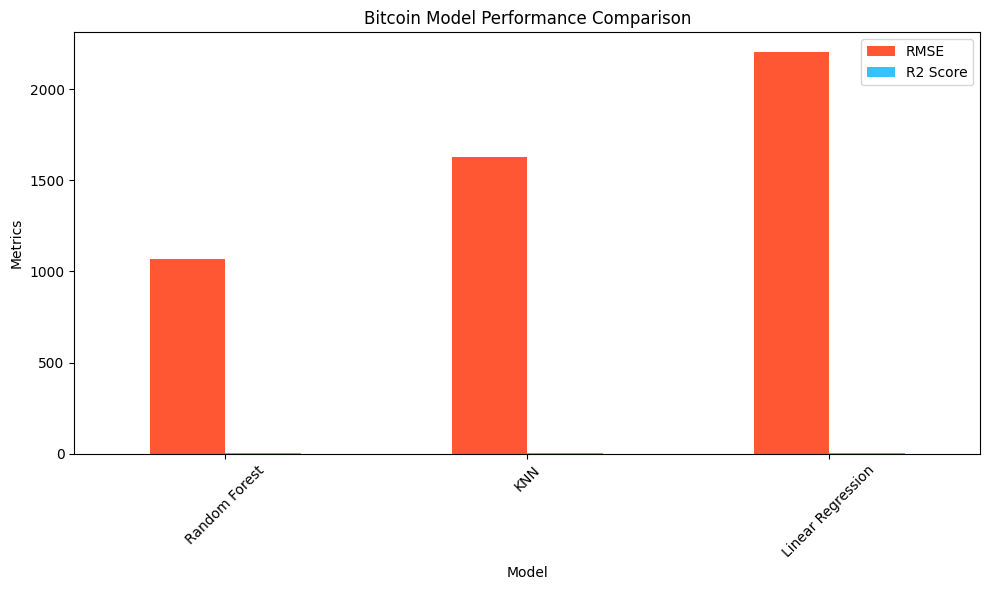

In [ ]:
# Visualization: Bitcoin Model Performance Comparison
results_btc_df.set_index('Model')[['RMSE', 'R2 Score']].plot(kind='bar',color=['#FF5733', '#33C1FF'],figsize=(10, 6))
plt.title('Bitcoin Model Performance Comparison')
plt.ylabel('Metrics')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


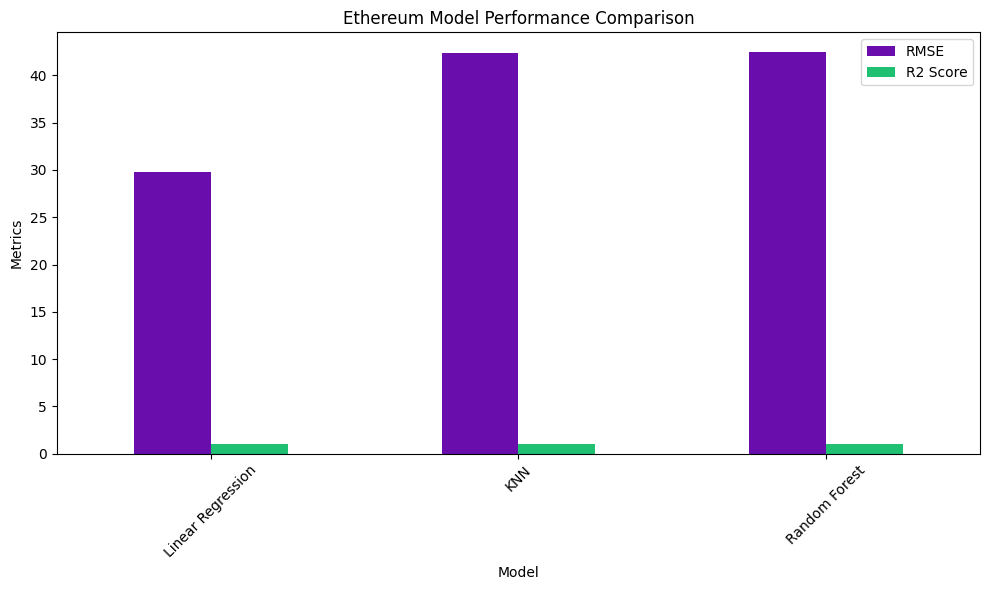

In [ ]:
# Visualization: Ethereum Model Performance Comparison
results_eth_df.set_index('Model')[['RMSE', 'R2 Score']].plot(kind='bar', color=['#6A0DAD', '#20C073'],figsize=(10, 6))
plt.title('Ethereum Model Performance Comparison')
plt.ylabel('Metrics')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

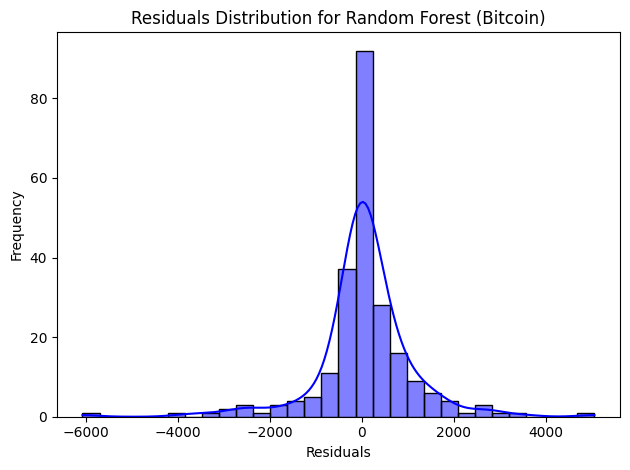

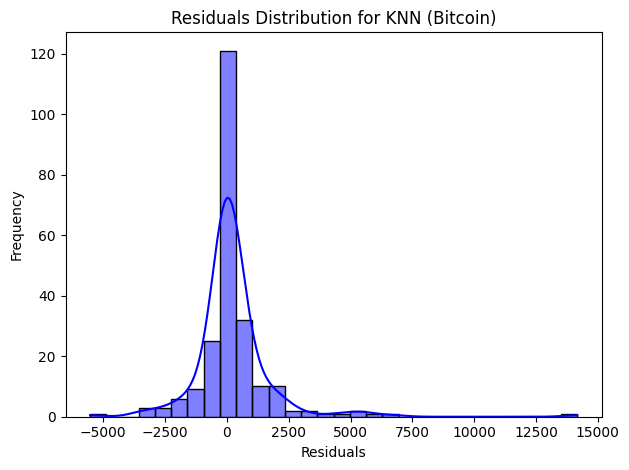

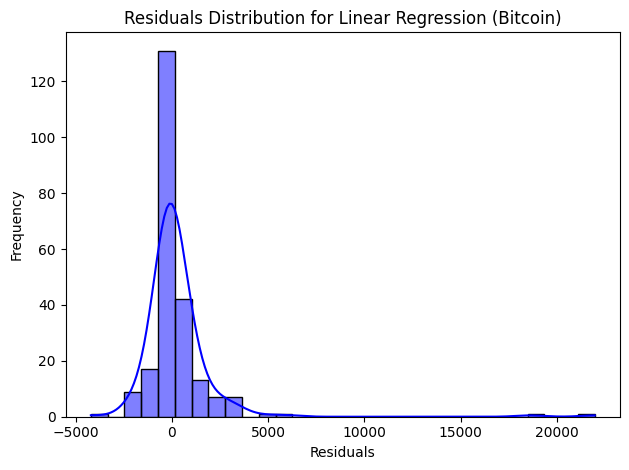

In [ ]:
# Residual Analysis for Bitcoin Models
for name, y_pred_btc in predictions_btc.items():
    residuals_btc = y_test_btc - y_pred_btc
    sns.histplot(residuals_btc, kde=True, bins=30, color='blue')
    plt.title(f'Residuals Distribution for {name} (Bitcoin)')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

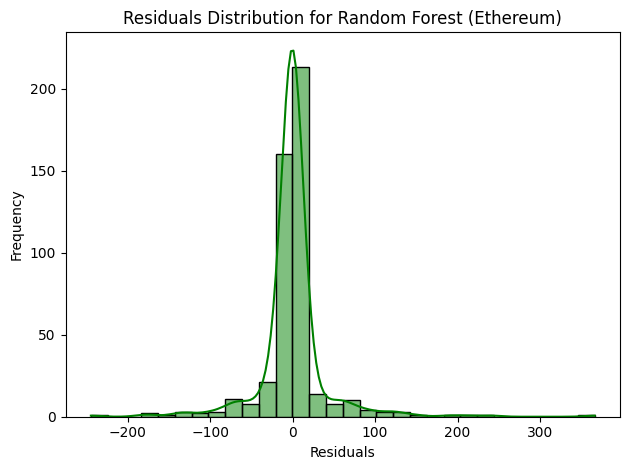

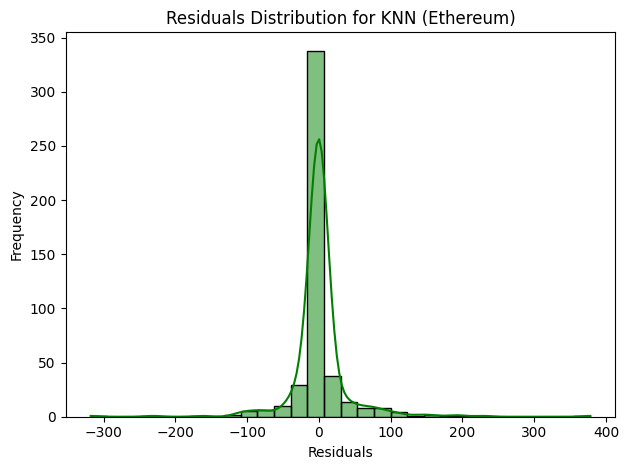

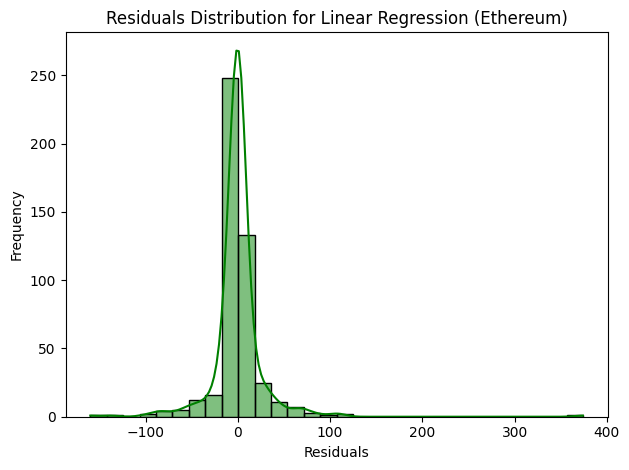

In [ ]:
# Residual Analysis for Ethereum Models
for name, y_pred_eth in predictions_eth.items():
    residuals_eth = y_test_eth - y_pred_eth
    sns.histplot(residuals_eth, kde=True, bins=30, color='green')
    plt.title(f'Residuals Distribution for {name} (Ethereum)')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

In [ ]:
# Highlight Best Models Bitcoin
print("Best Model for Bitcoin:")
print(results_btc_df.loc[results_btc_df['RMSE'].idxmin()])


Best Model for Bitcoin:
Model       Random Forest
RMSE          1069.725571
R2 Score         0.996322
Name: 0, dtype: object


In [ ]:
# Highlight Best Models Ethereum
print("Best Model for Ethereum:")
print(results_eth_df.loc[results_eth_df['RMSE'].idxmin()])

Best Model for Ethereum:
Model       Linear Regression
RMSE                29.778413
R2 Score             0.999276
Name: 2, dtype: object


Ethereum Analysis

Best Model: Linear Regression emerged as the best-performing model with:

RMSE: 29.78

R² Score: 0.9993

Insights:

The simpler relationships between features like Open, High, and Low allowed Linear Regression to perform exceptionally well.

Random Forest and KNN were competitive but slightly less effective in capturing Ethereum's feature-target relationships.

Challenges Faced

Feature Selection:

Ethereum lacked a Volume column, which required adapting the feature selection process to use only Open, High, and Low.

Model Tuning:

Hyperparameter tuning for Random Forest and KNN required significant computational resources.

Data Characteristics:

Bitcoin's higher volatility posed challenges for simpler models like Linear Regression.

